# An Empirical Comparison of Supervised and Self-Supervised Learning

In [72]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Baseline: convolutional neural network

In [74]:
conv_args = TrainArgs(batchsize = 10)

In [75]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified


Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 0, i:   999] avg mini-batch loss: 2.302
[epoch: 0, i:  1499] avg mini-batch loss: 2.301
[epoch: 0, i:  1999] avg mini-batch loss: 2.298
[epoch: 1, i:   499] avg mini-batch loss: 2.288
[epoch: 1, i:   999] avg mini-batch loss: 2.241
[epoch: 1, i:  1499] avg mini-batch loss: 2.186
[epoch: 1, i:  1999] avg mini-batch loss: 2.128
[epoch: 2, i:   499] avg mini-batch loss: 2.017
[epoch: 2, i:   999] avg mini-batch loss: 1.987
[epoch: 2, i:  1499] avg mini-batch loss: 1.905
[epoch: 2, i:  1999] avg mini-batch loss: 1.897
[epoch: 3, i:   499] avg mini-batch loss: 1.815
[epoch: 3, i:   999] avg mini-batch loss: 1.768
[epoch: 3, i:  1499] avg mini-batch loss: 1.786
[epoch: 3, i:  1999] avg mini-batch loss: 1.746
[epoch: 4, i:   499] avg mini-batch loss: 1.716
[epoch: 4, i:   999] avg mini-batch loss: 1.705
[epoch: 4, i:  1499] avg mini-batch loss: 1.652
[epoch: 4, i:  1999] avg mini-batc

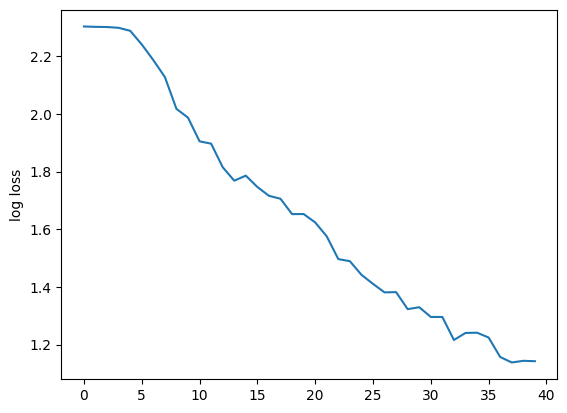

In [76]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [77]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Files already downloaded and verified
Baseline accuracy of the convolutional model is 54.84722222222223 %


## Momentum Contrast

### Pre-Training the Encoder

In [78]:
encoder_args = TrainArgs(epochs = 20)

In [79]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.040789
Train Epoch: 2 	Loss: 0.022208
Train Epoch: 3 	Loss: 0.014009
Train Epoch: 4 	Loss: 0.009621
Train Epoch: 5 	Loss: 0.007152
Train Epoch: 6 	Loss: 0.005725
Train Epoch: 7 	Loss: 0.004839
Train Epoch: 8 	Loss: 0.004379
Train Epoch: 9 	Loss: 0.003894
Train Epoch: 10 	Loss: 0.003606
Train Epoch: 11 	Loss: 0.003392
Train Epoch: 12 	Loss: 0.003199
Train Epoch: 13 	Loss: 0.003006
Train Epoch: 14 	Loss: 0.002928
Train Epoch: 15 	Loss: 0.002803
Train Epoch: 16 	Loss: 0.002649
Train Epoch: 17 	Loss: 0.002600
Train Epoch: 18 	Loss: 0.002501
Train Epoch: 19 	Loss: 0.002455
Train Epoch: 20 	Loss: 0.002370


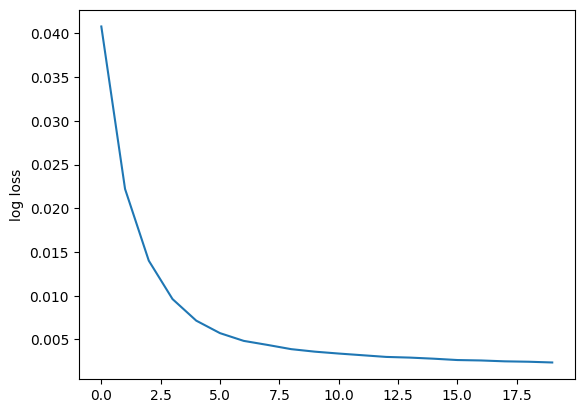

In [80]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [81]:
data, targets = encode_data()

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 36000/36000 [07:01<00:00, 85.37it/s]


In [82]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified
Files already downloaded and verified


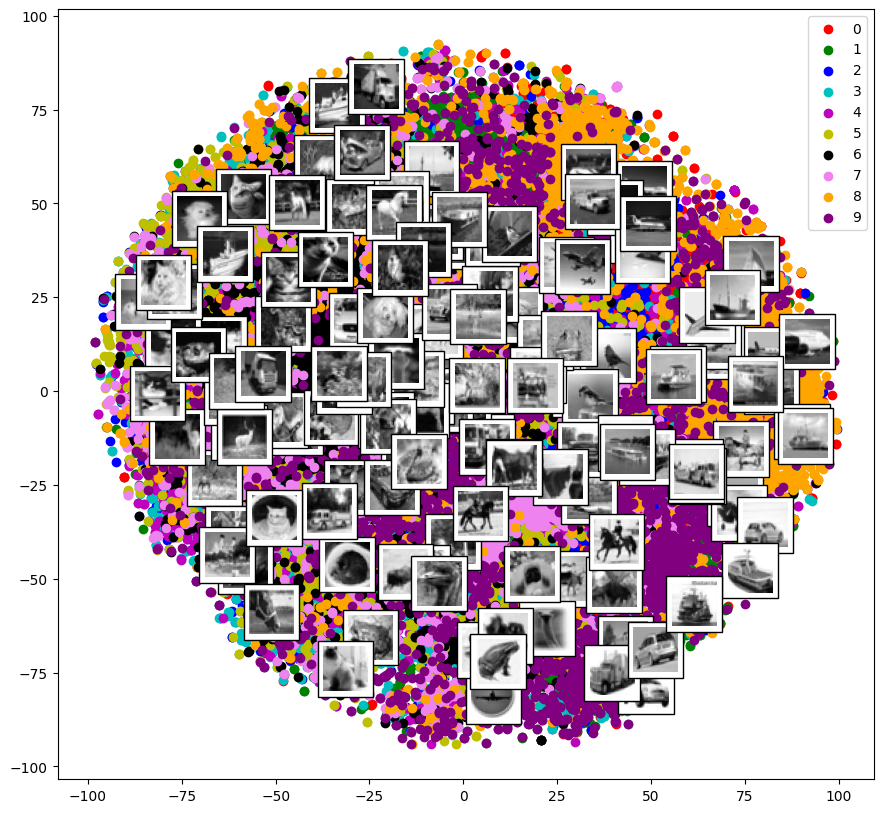

In [83]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [84]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 24000/24000 [04:36<00:00, 86.66it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 36000/36000 [06:57<00:00, 86.19it/s]


In [85]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [86]:
svm.score(X_test, y_test)

0.5955

### Multiple Runs

In [87]:
# subsample so things run faster
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 24000/24000 [04:38<00:00, 86.23it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 36000/36000 [06:59<00:00, 85.77it/s]


In [88]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [89]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=False)
    conv_errors.append(test_conv(ConvNet, subsample=False)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.300
[epoch: 0, i:   999] avg mini-batch loss: 2.284
[epoch: 0, i:  1499] avg mini-batch loss: 2.219
[epoch: 0, i:  1999] avg mini-batch loss: 2.123
[epoch: 1, i:   499] avg mini-batch loss: 2.001
[epoch: 1, i:   999] avg mini-batch loss: 1.946
[epoch: 1, i:  1499] avg mini-batch loss: 1.903
[epoch: 1, i:  1999] avg mini-batch loss: 1.852
[epoch: 2, i:   499] avg mini-batch loss: 1.764
[epoch: 2, i:   999] avg mini-batch loss: 1.758
[epoch: 2, i:  1499] avg mini-batch loss: 1.743
[epoch: 2, i:  1999] avg mini-batch loss: 1.686
[epoch: 3, i:   499] avg mini-batch loss: 1.562
[epoch: 3, i:   999] avg mini-batch loss: 1.566
[epoch: 3, i:  1499] avg mini-batch loss: 1.534
[epoch: 3, i:  1999] avg mini-batch loss: 1.549
[epoch: 4, i:   499] avg mini-batch loss: 1.455
[epoch: 4, i:   999] avg mini-batch loss: 1.460
[epoch: 4, i:  1499] avg mini-batch loss: 1.

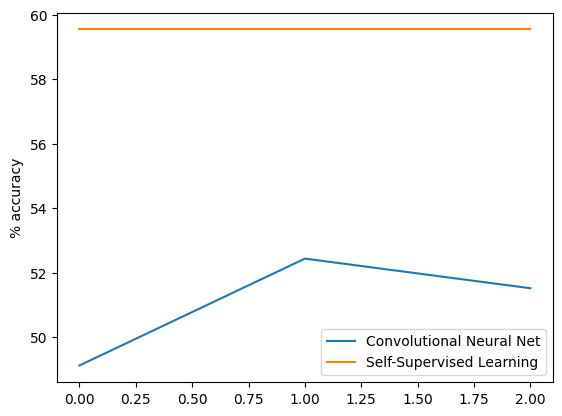

In [90]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [91]:
conv_errors

[49.12222222222222, 52.43888888888889, 51.51944444444444]

In [92]:
svm_errors

[0.5955, 0.5955, 0.5955]

In [93]:
conv_errors

[49.12222222222222, 52.43888888888889, 51.51944444444444]